## Text Scraping HW
Open Food Facts is a free food products database API. The links below contain the details about 12 different cookie products sold in United States and France. The question would be to find the salt and suger content in each cookie product and analysis if there are any nutriments trend based on the country that the food product is sold at. 


In [1]:
# Import modules
import requests
import pandas as pd
from pandas import DataFrame

# Define source data and lists needed
list_product = ["https://world.openfoodfacts.org/api/v0/product/638564701363.json", 
               "https://world.openfoodfacts.org/api/v0/product/00670043.json",
               "https://world.openfoodfacts.org/api/v0/product/0310072029251.json",
               "https://world.openfoodfacts.org/api/v0/product/0044000033392.json", 
               "https://world.openfoodfacts.org/api/v0/product/0014100075226.json",
               "https://world.openfoodfacts.org/api/v0/product/0018000817818.json",
               "https://world.openfoodfacts.org/api/v0/product/3564700000656.json",
               "https://world.openfoodfacts.org/api/v0/product/3229820794532.json", 
               "https://world.openfoodfacts.org/api/v0/product/3175681060586.json",
               "https://world.openfoodfacts.org/api/v0/product/3229820798769.json",
               "https://world.openfoodfacts.org/api/v0/product/3245550081155.json",
               "https://world.openfoodfacts.org/api/v0/product/3229820786841.json"]
list_countries = []
list_salt = []
list_sugars = []

# Load API & get product countries and nutriments info
for product in list_product:
    
    url = product
    resp = requests.get(url)
    food = resp.json()
    
    get_countries = food['product']['countries']
    list_countries.append(get_countries)
    get_salt = food['product']['nutriments']['salt_100g']
    list_salt.append(get_salt)
    get_sugars = food['product']['nutriments']['sugars_100g']
    list_sugars.append(get_sugars)

# Combine three lists into one
list_cookie = [list_countries, list_salt, list_sugars]

# After then
# Convert list to data frame
df = pd.DataFrame(list_cookie, index = ['Countries' , 'Salt', 'Sugars'])
df = df.T
df


,Countries,Salt,Sugars
0,United States,0,39
1,United States,0.508,36.67
2,United States,0.37846,45.95
3,United States,0.778,38.7
4,United States,0.586,38.5
5,United States,0.902,39.5
6,France,0.9,22
7,France,0.55,15
8,France,0.52,27
9,France,0.61,16


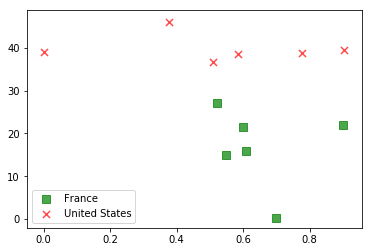

In [3]:
from mlxtend.plotting import category_scatter

# x-label: Salt 
# y-label: Sugar

fig = category_scatter(x = 'Salt', y = 'Sugars', label_col = 'Countries', 
                       data = df, colors = ('green','red'), markersize = 50.0, 
                       legend_loc = 'lower left')


The figure above shows selected cookies products sell in US have higher sugar content and lower salt content than in France. Since the cookies types are manually selected, not randomly selected, it is not appropriate to give causal inference and generalizable conclusion. Original code are posted on github. (https://github.com/joyleeisu/ABE516X-Text-Scraping.git)